In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as np

data=np.load('/content/drive/MyDrive/Traffic_Sign_Detection/data_unscaled.npy')
target=np.load('/content/drive/MyDrive/Traffic_Sign_Detection/target.npy')
data=data/255

In [4]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D,Dropout,BatchNormalization

model=Sequential()

model.add(Conv2D(64,(3,3),input_shape=data.shape[1:],kernel_initializer = 'orthogonal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(32,(3,3),kernel_initializer = 'orthogonal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())

model.add(Dropout(0.5))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128,activation='relu'))

model.add(Dense(43,activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
activation (Activation)      (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 32)        18464     
_________________________________________________________________
batch_normalization_1 (Batch (None, 22, 22, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 22, 22, 32)        0

In [5]:
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint('/content/drive/MyDrive/Traffic_Sign_Detection/weights/model-{epoch:03d}.h5',monitor='val_loss',save_best_only=True,mode='auto')

In [6]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [7]:
from keras.preprocessing.image import ImageDataGenerator

aug = ImageDataGenerator(rotation_range=20,zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.15,fill_mode="nearest")

In [8]:
bs=32

history=model.fit(aug.flow(train_data,train_target,batch_size=bs),validation_data=(test_data,test_target),epochs=300,callbacks=[checkpoint])

Epoch 1/300
1103/1103 [==============================] - 47s 15ms/step - loss: 3.5672 - accuracy: 0.0701 - val_loss: 3.2580 - val_accuracy: 0.0888
Epoch 2/300
1103/1103 [==============================] - 16s 14ms/step - loss: 3.2397 - accuracy: 0.1125 - val_loss: 2.2201 - val_accuracy: 0.3262
Epoch 3/300
1103/1103 [==============================] - 16s 14ms/step - loss: 2.6241 - accuracy: 0.2307 - val_loss: 1.8859 - val_accuracy: 0.3739
Epoch 4/300
1103/1103 [==============================] - 16s 14ms/step - loss: 2.3013 - accuracy: 0.3005 - val_loss: 1.7270 - val_accuracy: 0.4455
Epoch 5/300
1103/1103 [==============================] - 16s 14ms/step - loss: 2.1283 - accuracy: 0.3375 - val_loss: 1.5550 - val_accuracy: 0.5055
Epoch 6/300
1103/1103 [==============================] - 16s 14ms/step - loss: 1.9440 - accuracy: 0.3888 - val_loss: 1.3371 - val_accuracy: 0.5611
Epoch 7/300
1103/1103 [==============================] - 16s 15ms/step - loss: 1.7951 - accuracy: 0.4265 - val_loss: 1

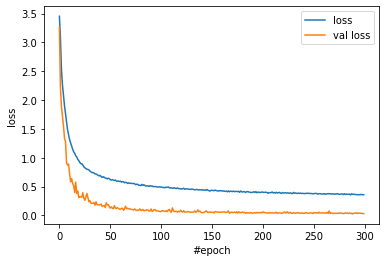

In [9]:
from matplotlib import pyplot as plt

plt.plot(model.history.history['loss'],label='loss')
plt.plot(model.history.history['val_loss'],label='val loss')
plt.legend()
plt.xlabel('#epoch')
plt.ylabel('loss')
plt.show()

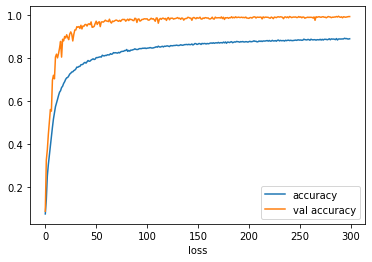

In [10]:
plt.plot(model.history.history['accuracy'],label='accuracy')
plt.plot(model.history.history['val_accuracy'],label='val accuracy')
plt.legend()
plt.xlabel('#epoch')
plt.xlabel('loss')
plt.show()